# Challenge: what test to use

Use the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html) to address the following questions. The same participants answered questions in 2012 and again in 2014. 

[Raw Data](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv)

[Variable Coding and content](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
df = pd.read_csv(path)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [31]:
df.shape

(8594, 13)

In [39]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [32]:
df['cntry'].nunique()

6

In [33]:
df['cntry'].value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.


In [7]:
def ess_hist(self):
    g = sns.FacetGrid(data=df, 
                      row='year',
                      col='cntry',
                      margin_titles=True,
                      dropna=True,
                      sharey=False)
    g.map(plt.hist, self)
    plt.show()
    
def ess_normaltest(self):
    for cntry in df['cntry'].unique():
        x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), self]
        y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), self]
        print('normal test {}'.format(cntry))
        print('2012: {}'.format(stats.normaltest(x, nan_policy='omit')))
        print('2014: {}'.format(stats.normaltest(y, nan_policy='omit')))

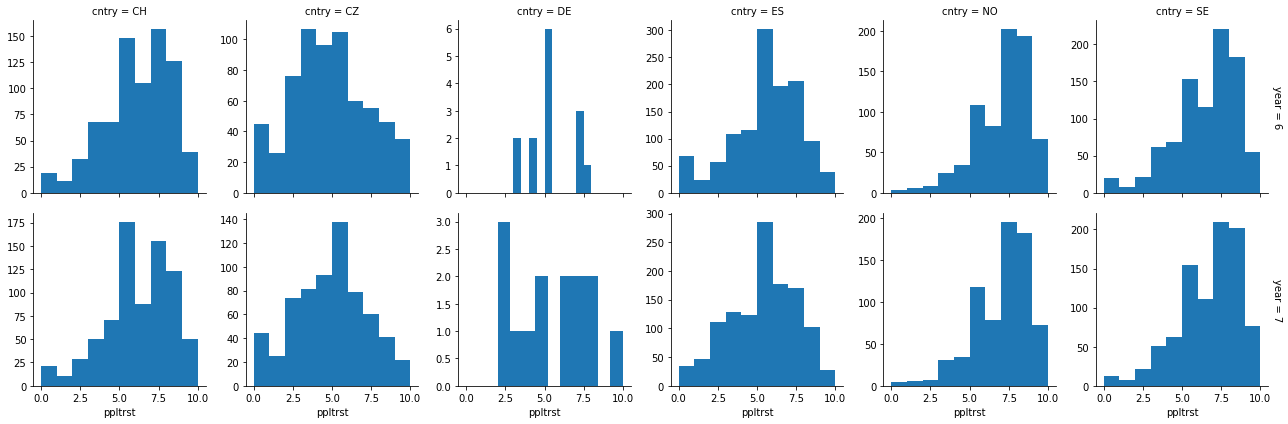

In [8]:
ess_hist('ppltrst')

In [9]:
ess_normaltest('ppltrst')

normal test CH
2012: NormaltestResult(statistic=34.41403485540727, pvalue=3.365792056559453e-08)
2014: NormaltestResult(statistic=32.07122389622901, pvalue=1.0859809748932778e-07)
normal test CZ
2012: NormaltestResult(statistic=25.049370820773337, pvalue=3.6357853778444874e-06)
2014: NormaltestResult(statistic=8.015640651166011, pvalue=0.0181729632415102)
normal test DE
2012: NormaltestResult(statistic=0.5537028123495471, pvalue=0.7581671476973477)
2014: NormaltestResult(statistic=0.6451892229565249, pvalue=0.7242674045554323)
normal test ES
2012: NormaltestResult(statistic=48.02764152552339, pvalue=3.7233182008430934e-11)
2014: NormaltestResult(statistic=29.796593978669407, pvalue=3.3865058313913864e-07)
normal test NO
2012: NormaltestResult(statistic=85.4862970000314, pvalue=2.7345537691839186e-19)
2014: NormaltestResult(statistic=71.2109329693447, pvalue=3.441457258129768e-16)
normal test SE
2012: NormaltestResult(statistic=72.6342910118729, pvalue=1.6891340175735596e-16)
2014: Norm

Looks like none of the distributions are normal, except DE (but there was a very small sample size)

We will use Wilcoxon Ranked for A/B where participants did both versions

In [10]:
# non-normal distributions (except DE but small sample size...)
# use wilcoxon ranked for a/b where participants did both versions
for cntry in df['cntry'].unique():
    x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), 'ppltrst']
    y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), 'ppltrst']
    result = stats.wilcoxon(x,y)
    print('\nTrust results for {}'.format(cntry))
    print('Mean 2012: {}'.format(np.mean(x)))
    print('Mean 2014: {}'.format(np.mean(y)))
    print(result)
    if cntry == 'DE':
        print(stats.ttest_rel(x, y, nan_policy='omit'))


Trust results for CH
Mean 2012: 5.677878395860285
Mean 2014: 5.751617076326003
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

Trust results for CZ
Mean 2012: 4.362519201228879
Mean 2014: 4.424657534246576
WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

Trust results for DE
Mean 2012: 5.214285714285714
Mean 2014: 5.357142857142857
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

Trust results for ES
Mean 2012: 5.114591920857379
Mean 2014: 4.895127993393889
WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

Trust results for NO
Mean 2012: 6.64931506849315
Mean 2014: 6.598630136986301
WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

Trust results for SE
Mean 2012: 6.058498896247241
Mean 2014: 6.257709251101321
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


__Results:__ given the range of answers 0-10 of H values between ~82xxx and ~243xxxx

- Significant change
    - ES (Spain): significant decrease in trust, mean went down about .2
    - SE (Sweden): significant increase in trust, mean went up about .2
- No significant change
    - CH (Switzerland): non significant pval = .44
    - CZ (Czech Republic): non significant pval = .29
    - DE (Denmark): non significant pval = .91, .85
    - NO (Norway): non significant pval = .61

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample

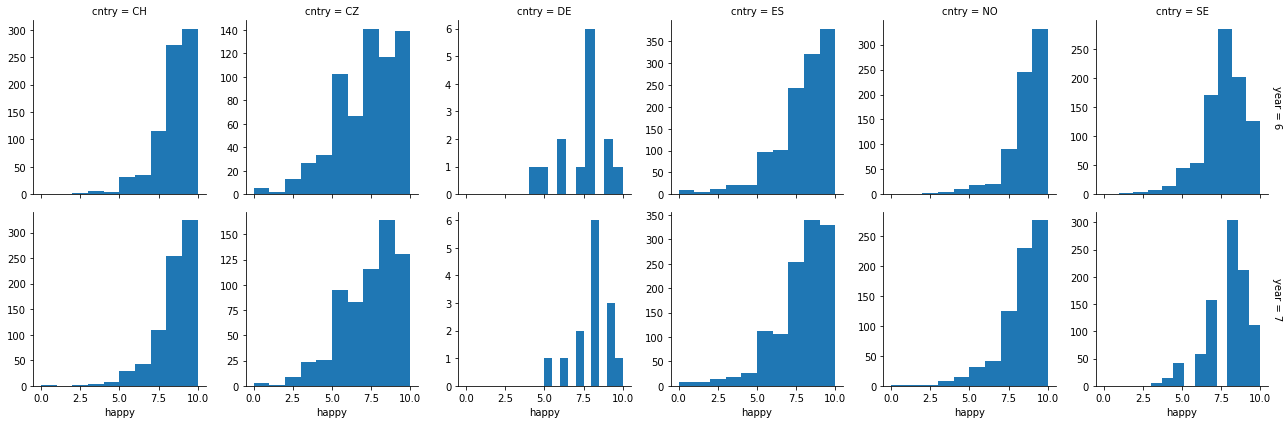

In [11]:
ess_hist('happy')

In [12]:
ess_normaltest('happy')

normal test CH
2012: NormaltestResult(statistic=188.44583258657116, pvalue=1.2009014936632828e-41)
2014: NormaltestResult(statistic=156.83716655039797, pvalue=8.774896545471838e-35)
normal test CZ
2012: NormaltestResult(statistic=33.31170486577394, pvalue=5.840569510842764e-08)
2014: NormaltestResult(statistic=41.51459060672008, pvalue=9.665430236613688e-10)
normal test DE
2012: NormaltestResult(statistic=1.506462655423323, pvalue=0.4708426450576315)
2014: NormaltestResult(statistic=2.1782905366822414, pvalue=0.33650399143734494)
normal test ES
2012: NormaltestResult(statistic=211.81535847203477, pvalue=1.0112983918145527e-46)
2014: NormaltestResult(statistic=196.39100576911136, pvalue=2.260658435940068e-43)
normal test NO
2012: NormaltestResult(statistic=228.52086537729167, pvalue=2.38410063518236e-50)
2014: NormaltestResult(statistic=182.17416218051966, pvalue=2.7630154274213406e-40)
normal test SE
2012: NormaltestResult(statistic=142.6192698491184, pvalue=1.0730477437761676e-31)
201

In [13]:
# non normal dists so non parametric
# wilcoxon signed-rank for a/b test where participants did both versions
for cntry in df['cntry'].unique():
    x = df.loc[(df['year'] == 6) & (df['cntry'] == cntry), 'happy']
    y = df.loc[(df['year'] == 7) & (df['cntry'] == cntry), 'happy']
    result = stats.wilcoxon(x, y)
    print('\nHappy results for {}'.format(cntry))
    print('Mean 2012: {}'.format(np.mean(x)))
    print('Mean 2014: {}'.format(np.mean(y)))
    print(result)
    if cntry == 'DE':
        print(stats.ttest_rel(x, y, nan_policy='omit'))


Happy results for CH
Mean 2012: 8.088311688311688
Mean 2014: 8.116429495472186
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

Happy results for CZ
Mean 2012: 6.7708978328173375
Mean 2014: 6.914110429447852
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

Happy results for DE
Mean 2012: 7.428571428571429
Mean 2014: 7.857142857142857
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

Happy results for ES
Mean 2012: 7.548679867986799
Mean 2014: 7.41996699669967
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

Happy results for NO
Mean 2012: 8.25171939477304
Mean 2014: 7.9151846785225715
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

Happy results for SE
Mean 2012: 7.907386990077177
Mean 2014: 7.946961325966851
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


__Results:__ given the range of answers 0-10 of H values between 23.5 and ~23xxxx

- Significant change
    - CZ (Czech Republic): significant increase in happiness, mean is up .2 p val .01
- Borderline
    - ES (Spain): pval is .49 so technically this could be interpreted as a significant decrease in happiness (mean down ~ .13)
- No significant change
    - CH (Switzerland): non significant pval = .44
    - DE (Denmark): non significant pval = .91, .85
    - NO (Norway): non significant pval = .61
    - SE (Sweden): non significant pval = .51

## 3. Who reported watching more TV in 2012, men or women?

In [18]:
print(len(df.loc[(df['year'] == 6) & (df['gndr'] == 1), 'tvtot']))
print(len(df.loc[(df['year'] == 6) & (df['gndr'] == 2), 'tvtot']))

2154
2143


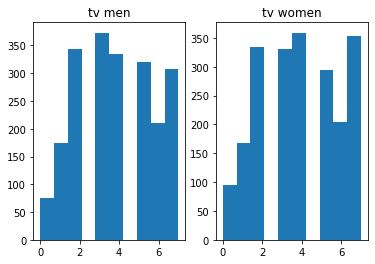

NormaltestResult(statistic=404.31757946854253, pvalue=1.5979130741376727e-88)
NormaltestResult(statistic=473.95970583307366, pvalue=1.2049181771413786e-103)
WilcoxonResult(statistic=842386.0, pvalue=0.424144580611013)


In [20]:
tv_women_2012 = df.loc[(df['year'] == 6) & (df['gndr'] == 2), 'tvtot'].dropna()
tv_men_2012 = df.loc[
    (df['year'] == 6) & (df['gndr'] == 1), 'tvtot'
].dropna().sample(len(tv_women_2012))

plt.subplot(1,2,1)
plt.hist(tv_men_2012.dropna())
plt.title('tv men')
         
plt.subplot(1,2,2)
plt.hist(tv_women_2012.dropna())
plt.title('tv women')
plt.show()

print(stats.normaltest(tv_men_2012))
print(stats.normaltest(tv_women_2012))
print(stats.wilcoxon(tv_men_2012, tv_women_2012))

__Result:__ with a pval of .424 we can't confidently conclude there was a significant difference in the amount of tv men and women watched in 2012

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [21]:
# 1 live w partner 2 live alone
live_partner = df.loc[(df['partner'] == 1) & (df['year'] == 6), 'pplfair'].dropna()
live_alone = df.loc[(df['partner'] == 2) & (df['year'] == 6), 'pplfair'].dropna()

print(len(live_partner), len(live_alone))

2663 1608


In [22]:
live_partner = live_partner.sample(len(live_alone))

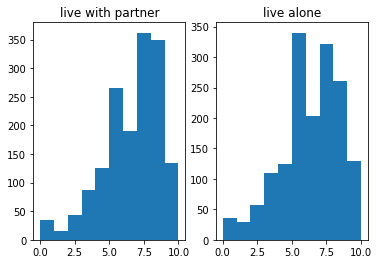

NormaltestResult(statistic=121.4699684754831, pvalue=4.198860895294423e-27)
NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)


In [23]:
plt.subplot(1,2,1)
plt.hist(live_partner)
plt.title('live with partner')

plt.subplot(1,2,2)
plt.hist(live_alone)
plt.title('live alone')
plt.show()

print(stats.normaltest(live_partner))
print(stats.normaltest(live_alone))

In [24]:
print('mean live with partner: {}'.format(np.mean(live_partner)))
print('mean live alone: {}'.format(np.mean(live_alone)))
print(stats.wilcoxon(live_partner, live_alone))

mean live with partner: 6.172885572139304
mean live alone: 5.856965174129353
WilcoxonResult(statistic=403997.0, pvalue=4.48173585626916e-06)


__Results:__ can say with confidence that those who lived alone in 2012 thought people were less trustworthy than people who lived with a partner

['CZ' 'SE' 'ES' 'NO']


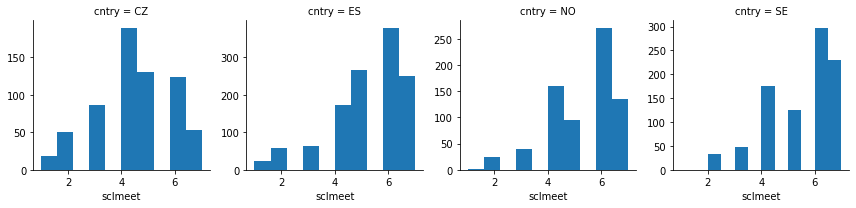

CZ: NormaltestResult(statistic=79.93520409212844, pvalue=4.3882461097052515e-18)
SE: NormaltestResult(statistic=145.63772426391498, pvalue=2.3723021236027454e-32)
ES: NormaltestResult(statistic=207.30963817201416, pvalue=9.622414221022273e-46)
NO: NormaltestResult(statistic=117.20984403812162, pvalue=3.533505362569494e-26)


In [25]:
# randomly choose 4 countries
countries = np.random.choice(
    df.loc[df['cntry'] != 'DE', 'cntry'].unique(),
    4,
    replace=False
)
print(countries)

df_countries = df[(df.cntry).isin(countries) & (df.year == 7)]
g = sns.FacetGrid(df_countries,
                  col='cntry',
                  dropna=True,
                  sharey=False)
g.map(plt.hist, 'sclmeet')
plt.show()

for cntry in countries:
    print('{}: {}'.format(
        cntry,
        stats.stats.normaltest(df.loc[df['cntry'] == cntry, 'sclmeet'],
                               nan_policy='omit')))

In [26]:
import itertools
cntry_pairs = list(itertools.combinations(countries, 2))

for pair in cntry_pairs:
    x = df_countries.loc[df_countries['cntry'] == pair[0], 'sclmeet']
    y = df_countries.loc[df_countries['cntry'] == pair[1], 'sclmeet']
    if len(x) < len(y):
        y = y.sample(len(x))
        result = stats.wilcoxon(x,y)
    elif len(y) < len(x):
        x = x.sample(len(y))
        result = stats.wilcoxon(x,y)
    else:
        result = stats.wilcoxon(x,y)
    print('{0} and {1}: {2}'.format(pair[0], pair[1], result))

CZ and SE: WilcoxonResult(statistic=30309.5, pvalue=1.859061952178424e-30)
CZ and ES: WilcoxonResult(statistic=38976.0, pvalue=8.781478008871816e-22)
CZ and NO: WilcoxonResult(statistic=42167.5, pvalue=2.9934515976233213e-22)
SE and ES: WilcoxonResult(statistic=115257.5, pvalue=0.048728187079984255)
SE and NO: WilcoxonResult(statistic=71576.0, pvalue=0.06504909375003737)
ES and NO: WilcoxonResult(statistic=80595.0, pvalue=0.4381776776522046)


## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

['CZ' 'SE' 'ES' 'NO']


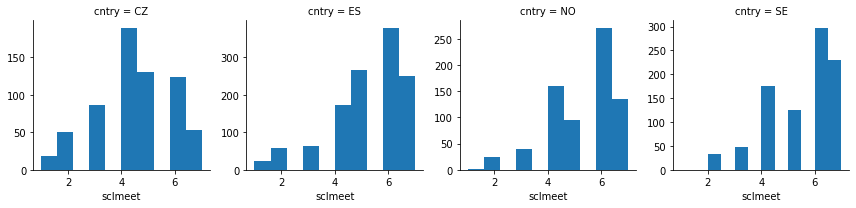

CZ: NormaltestResult(statistic=79.93520409212844, pvalue=4.3882461097052515e-18)
SE: NormaltestResult(statistic=145.63772426391498, pvalue=2.3723021236027454e-32)
ES: NormaltestResult(statistic=207.30963817201416, pvalue=9.622414221022273e-46)
NO: NormaltestResult(statistic=117.20984403812162, pvalue=3.533505362569494e-26)


In [27]:
# randomly choose 4 countries
countries = np.random.choice(
    df.loc[df['cntry'] != 'DE', 'cntry'].unique(),
    4,
    replace=False
)
print(countries)

df_countries = df[(df.cntry).isin(countries) & (df.year == 7)]
g = sns.FacetGrid(df_countries,
                  col='cntry',
                  dropna=True,
                  sharey=False)
g.map(plt.hist, 'sclmeet')
plt.show()

for cntry in countries:
    print('{}: {}'.format(
        cntry,
        stats.stats.normaltest(df.loc[df['cntry'] == cntry, 'sclmeet'],
                               nan_policy='omit')))

In [28]:
import itertools
cntry_pairs = list(itertools.combinations(countries, 2))

for pair in cntry_pairs:
    x = df_countries.loc[df_countries['cntry'] == pair[0], 'sclmeet']
    y = df_countries.loc[df_countries['cntry'] == pair[1], 'sclmeet']
    if len(x) < len(y):
        y = y.sample(len(x))
        result = stats.wilcoxon(x,y)
    elif len(y) < len(x):
        x = x.sample(len(y))
        result = stats.wilcoxon(x,y)
    else:
        result = stats.wilcoxon(x,y)
    print('{0} and {1}: {2}'.format(pair[0], pair[1], result))

CZ and SE: WilcoxonResult(statistic=33130.0, pvalue=5.471406434883582e-30)
CZ and ES: WilcoxonResult(statistic=35643.0, pvalue=3.022586562051644e-22)
CZ and NO: WilcoxonResult(statistic=33361.5, pvalue=7.941312510088789e-26)
SE and ES: WilcoxonResult(statistic=112875.0, pvalue=0.0006169463847528957)
SE and NO: WilcoxonResult(statistic=68808.0, pvalue=0.0424506075373959)
ES and NO: WilcoxonResult(statistic=86048.5, pvalue=0.6758317168263005)


__Result__: Sweden (SE) and Spain (ES) have a significant difference in how often they met socially in 2014

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [43]:
df['agea'].nunique()

83

In [47]:
df.agea.describe()

count    8355.000000
mean       47.470736
std        18.397369
min        15.000000
25%        33.000000
50%        47.000000
75%        62.000000
max       114.000000
Name: agea, dtype: float64

83 different ages, we need to bucket them into age groups to compare their social activities. Since the youngest age in this dataset is 15, the respondents will be bucketed into the following age bands:


- 15 – 29 years
- 30 – 44 years
- 45 – 59 years
- 60 years and above


In [74]:
age_bands = [14, 29, 44, 59, 10000]
labels = [1, 2, 3, 4]

df['age_band'] = pd.cut(x=df['agea'], bins=age_bands, labels=labels)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,age_band
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,4
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,3
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,1
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,4
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,3


In [75]:
df.age_band.value_counts()

4    2366
3    2227
2    2090
1    1672
Name: age_band, dtype: int64

Countries selected:  ['CH' 'NO' 'CZ' 'SE']


Country:  CH


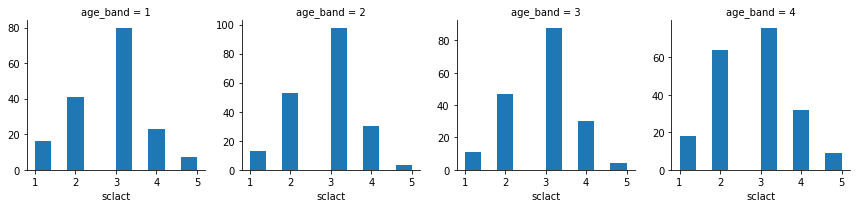

Country:  NO


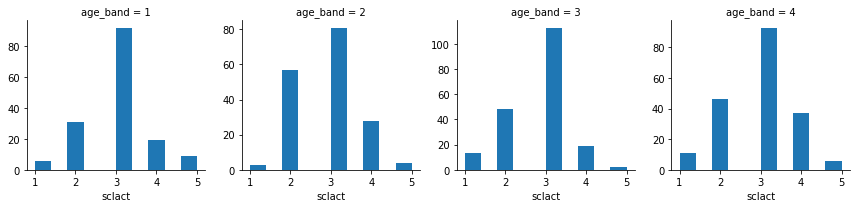

Country:  CZ


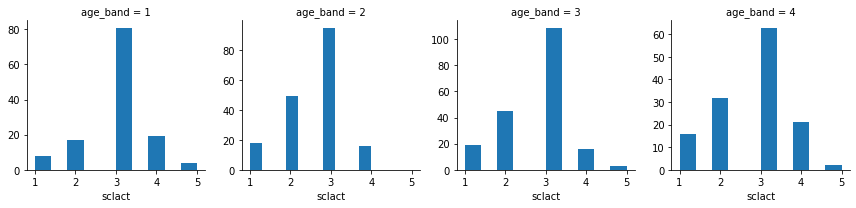

Country:  SE


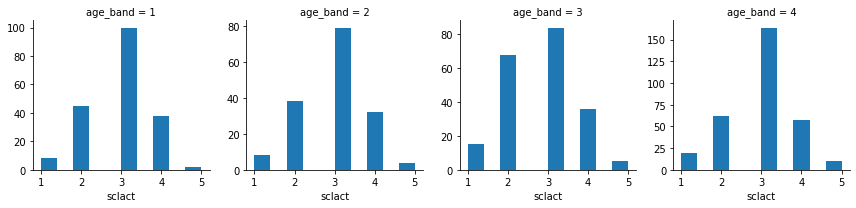

Country: CH, Age band 1: NormaltestResult(statistic=0.17929856180492426, pvalue=0.9142517746068534)
Country: CH, Age band 2: NormaltestResult(statistic=0.39169506969210005, pvalue=0.8221375724546744)
Country: CH, Age band 3: NormaltestResult(statistic=0.13305547690396013, pvalue=0.9356369623754262)
Country: CH, Age band 4: NormaltestResult(statistic=2.4690356576802044, pvalue=0.29097502831594113)


Country: NO, Age band 1: NormaltestResult(statistic=5.626489431620492, pvalue=0.06000996088372266)
Country: NO, Age band 2: NormaltestResult(statistic=3.719239668734242, pvalue=0.15573182300283295)
Country: NO, Age band 3: NormaltestResult(statistic=4.994502025527661, pvalue=0.08231095967712483)
Country: NO, Age band 4: NormaltestResult(statistic=0.09033117170995593, pvalue=0.9558391952780827)


Country: CZ, Age band 1: NormaltestResult(statistic=6.494008611196747, pvalue=0.038890537666371086)
Country: CZ, Age band 2: NormaltestResult(statistic=5.982403377414385, pvalue=0.050227043173158896)

In [152]:
# randomly choose 4 countries
countries = np.random.choice(
    df.loc[df['cntry'] != 'DE', 'cntry'].unique(),
    4,
    replace=False
)

print("Countries selected: ", countries)
print("\n")



df_countries = df[(df.cntry).isin(countries) & (df.year == 7)]

# plot the social activities for each age band, per country:

for country in countries:    
    print("Country: ", country)
    g = sns.FacetGrid(df_countries.loc[df_countries.cntry == country],
                      col='age_band',
                      dropna=True,
                      sharey=False)
    g.map(plt.hist, 'sclact')
    plt.show()

normal_sclact = {}    
for country in countries:
    
    for age_band in [1, 2, 3, 4]: 
        normaltest = stats.stats.normaltest(df_countries.loc[(df_countries['cntry'] == country) &
                                                             (df_countries['age_band'] == age_band), 
                                                             'sclact'],
                                                              nan_policy='omit')
        print('Country: {}, Age band {}: {}'.format(country, age_band, normaltest))
        
        if normaltest.pvalue < 0.05:
            normal_sclact.update(Country=country, Age_band=age_band)
    print("\n")

print("Social activities in groups with normal distribution: ")
print(normal_sclact)

In [156]:
import itertools
cntry_pairs = list(itertools.combinations(countries, 2))

for age_band in [1, 2, 3, 4]:
    print("*****************")
    print("Age Band: {}".format(age_band))
    for pair in cntry_pairs:
        x = df_countries.loc[(df_countries['cntry'] == pair[0]) & (df_countries['age_band'] == age_band), 'sclact']
        y = df_countries.loc[(df_countries['cntry'] == pair[1]) & (df_countries['age_band'] == age_band), 'sclact']
        if len(x) < len(y):
            y = y.sample(len(x))
            result = stats.wilcoxon(x,y)
        elif len(y) < len(x):
            x = x.sample(len(y))
            result = stats.wilcoxon(x,y)
        else:
            result = stats.wilcoxon(x,y)
        
        if result.pvalue < 0.05:
            print('{0} and {1}: {2}'.format(pair[0], pair[1], result))

*****************
Age Band: 1
*****************
Age Band: 2
CH and CZ: WilcoxonResult(statistic=2343.0, pvalue=0.03957542911944402)
CH and SE: WilcoxonResult(statistic=2401.0, pvalue=0.012665089330114232)
NO and CZ: WilcoxonResult(statistic=2148.5, pvalue=0.002948249205968483)
CZ and SE: WilcoxonResult(statistic=2269.0, pvalue=0.0008172954292486671)
*****************
Age Band: 3
CH and CZ: WilcoxonResult(statistic=2874.0, pvalue=0.009348781595645658)
*****************
Age Band: 4
CH and SE: WilcoxonResult(statistic=4272.0, pvalue=0.049699652178788516)
NO and CZ: WilcoxonResult(statistic=1934.5, pvalue=0.03334592398632947)
CZ and SE: WilcoxonResult(statistic=1931.0, pvalue=0.016292991340042577)


Looks like there are no significant differences in the social activities between the first age band amongst the countries, but there are significant differences in the social activity levels of next couple of age bands, between certain country pairs. 